In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patch
import astropy as astro
import pandas as pd
import plotly as py
import plotly.graph_objects as go
import plotly.express as px

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=73 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)


In [2]:
df=pd.read_csv(r'tree_G2.csv', delimiter=',', skiprows=0)

In [3]:

df['Baryonic Mass']=df['coldGas']+df['stellarMass']+df['hotGas']
df['Age']=cosmo.lookback_time(df['redshift'])
df['Redshift']=df['redshift']
df['B-V']=df['mag_b']-df['mag_v']
table1=df[0:49]

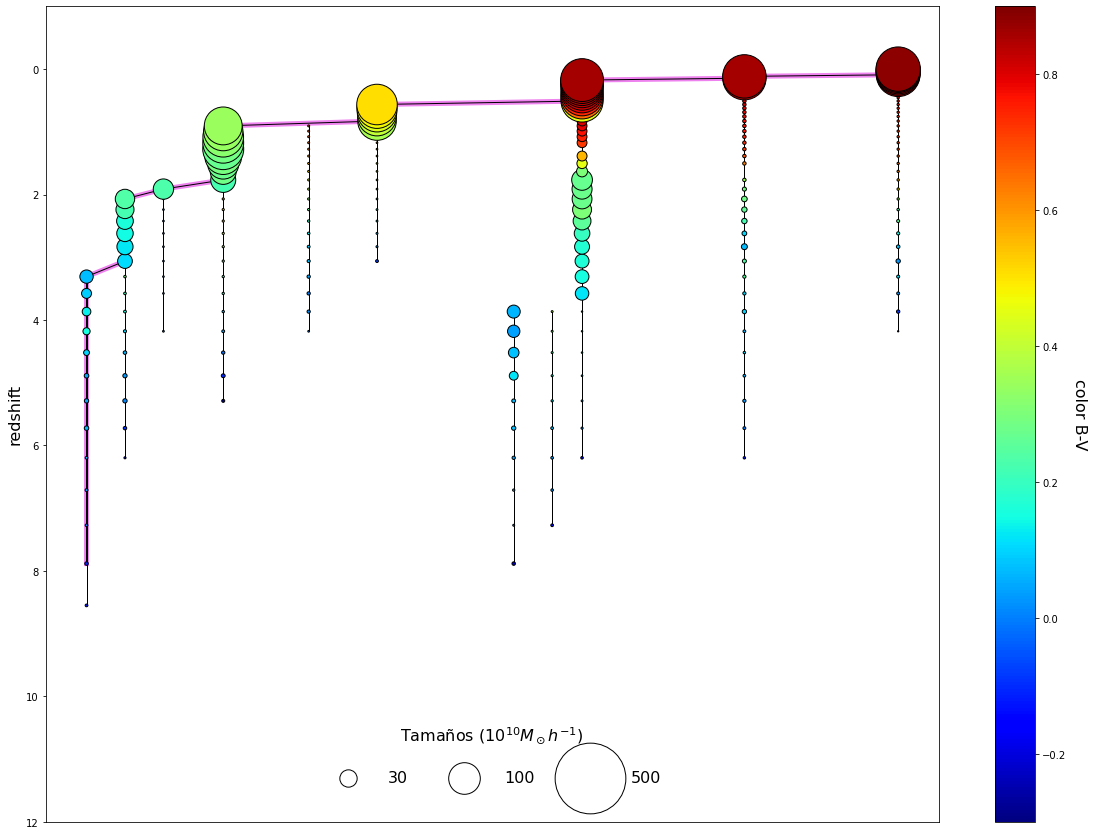

In [4]:
df=df.reindex(index=df.index[::-1])
grouped = df.groupby(df.lastProgenitorId)
plt.figure(figsize=(20,15))
for name, group in grouped:
    group=group.reset_index()
    group=group.dropna(axis=0,how='any')
    group=group.reset_index(drop=True)
    size=group['Baryonic Mass']*50
    color=group['B-V']
    bb=plt.scatter(group['lastProgenitorId'],group['redshift'], marker='o',
            cmap='jet',s=size, c=color,zorder=2,edgecolor='black', linewidth=1)
    plt.clim(-0.3,.9)
    plt.plot(group['lastProgenitorId'],group['redshift'], 'black',linewidth=1,zorder=1)
    
plt.plot(table1['lastProgenitorId'],table1['redshift'], 'violet',linewidth=5,zorder=0)
plt.plot(table1['lastProgenitorId'],table1['redshift'], 'black',linewidth=1,zorder=0)
plt.ylabel('redshift',fontsize = 16)
cbar = plt.colorbar(bb)
plt.clim(-0.3,.9)
l1 = plt.scatter([],[], s=300, color='white', edgecolors='black')
l2 = plt.scatter([],[], s=1000, color='white', edgecolors='black')
l3 = plt.scatter([],[], s=5000, color='white', edgecolors='black')

labels = ["30", "100", "500"]

leg = plt.legend([l1, l2, l3], labels, ncol=4, frameon=False, fontsize=16,
                 handlelength=3, loc = 8, borderpad = 1,
                 handletextpad=1, title='Tamaños ($10^{10}M_\odot h^{-1}$) \n',title_fontsize=16, scatterpoints = 1,
                bbox_to_anchor=(0.5, 0.015))




plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


plt.ylim(12,-1)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('color B-V', rotation=270,fontsize=16)







#plt.savefig('tree2_figs/mergertree.png', facecolor='white', edgecolor='none')

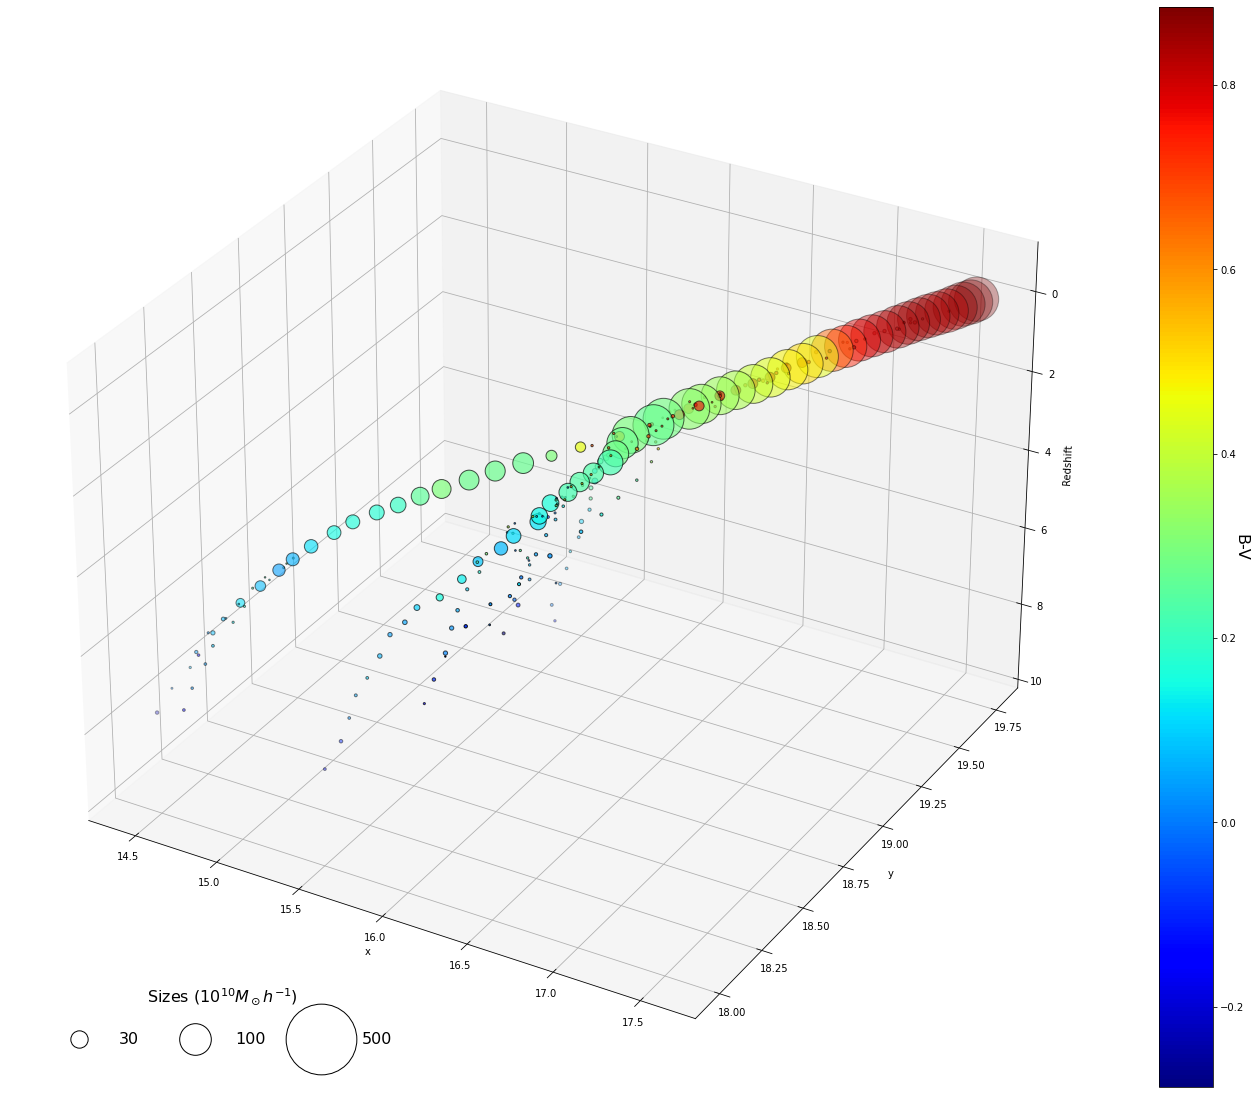

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,15))
ax = Axes3D(fig)


size=df['Baryonic Mass']*50
color=df['B-V']

    
xs = df['x']
ys = df['y']
zs = df['Redshift']
img=ax.scatter(xs, ys, zs, marker='o',
        cmap='jet',s=size, c=color,edgecolor='black', linewidth=1)

cbar=fig.colorbar(img)
cbar.set_label('B-V', rotation=270,fontsize=16)

l1 = ax.scatter([],[], s=300, color='white', edgecolors='black')
l2 = ax.scatter([],[], s=1000, color='white', edgecolors='black')
l3 = ax.scatter([],[], s=5000, color='white', edgecolors='black')

labels = ["30", "100", "500"]

leg = ax.legend([l1, l2, l3], labels, ncol=4, frameon=False, fontsize=16,
                 handlelength=3, loc = 8, borderpad = 1,
                 handletextpad=1, title='Sizes ($10^{10}M_\odot h^{-1}$) \n',title_fontsize=16, scatterpoints = 1,
                bbox_to_anchor=(0.2, 0.015))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Redshift')
ax.set_zlim(10,-1)

plt.savefig('tree1_figs/mergertree_3D.png', facecolor='white', edgecolor='none')



In [11]:
fig = px.scatter_3d(df, x='y', y='x', z='Redshift',
                       size="Baryonic Mass", color='B-V', color_continuous_scale=px.colors.sequential.Jet,range_color=(-0.3,.9),
                    size_max=80, opacity=1, title='Merger Tree')

fig.update_layout(
    scene = dict(
        yaxis = dict(nticks=8, range=[14,18]),
        xaxis = dict(nticks=8, range=[19.9,17.5]),
        zaxis = dict(nticks=10, range=[10,-1])),
    width=800,
    height=800,
    scene_aspectmode='cube')

fig.write_html("mergertree1.html")
fig.show()